In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv("flights.csv", low_memory=False)

In [3]:
airport = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')
data_jan = data.iloc[0:469967] #To extract the data of January

In [4]:
data_jan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469967 entries, 0 to 469966
Data columns (total 31 columns):
YEAR                   469967 non-null int64
MONTH                  469967 non-null int64
DAY                    469967 non-null int64
DAY_OF_WEEK            469967 non-null int64
AIRLINE                469967 non-null object
FLIGHT_NUMBER          469967 non-null int64
TAIL_NUMBER            467185 non-null object
ORIGIN_AIRPORT         469967 non-null object
DESTINATION_AIRPORT    469967 non-null object
SCHEDULED_DEPARTURE    469967 non-null int64
DEPARTURE_TIME         458310 non-null float64
DEPARTURE_DELAY        458310 non-null float64
TAXI_OUT               458091 non-null float64
WHEELS_OFF             458091 non-null float64
SCHEDULED_TIME         469967 non-null float64
ELAPSED_TIME           457012 non-null float64
AIR_TIME               457012 non-null float64
DISTANCE               469967 non-null int64
WHEELS_ON              457696 non-null float64
TAXI_IN       

In [5]:
data_jan.shape


(469967, 31)

In [6]:
data_jan.describe()


,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,469967.0,469967.0,469967.000000,469967.000000,469967.000000,469967.000000,458310.000000,458310.000000,458091.000000,458091.000000,...,469967.000000,457696.000000,457012.000000,469967.000000,469967.000000,95951.000000,95951.000000,95951.000000,95951.000000,95951.000000
mean,2015.0,1.0,15.852968,4.025555,2266.354374,1323.511189,1333.026305,9.759495,16.456484,1356.756330,...,1506.725602,1493.232576,5.813591,0.002070,0.025495,13.319872,0.069827,17.802368,22.760211,2.741889
std,0.0,0.0,8.952785,1.933772,1804.270740,468.144715,479.637750,36.636527,9.524411,479.610621,...,483.556003,502.956808,39.413543,0.045454,0.157624,24.723111,2.068116,45.334536,40.939751,18.510443
min,2015.0,1.0,1.000000,1.000000,1.000000,5.000000,1.000000,-48.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.0,8.000000,2.000000,760.000000,925.000000,930.000000,-5.000000,11.000000,946.000000,...,1124.000000,1117.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.0,16.000000,4.000000,1735.000000,1320.000000,1328.000000,-2.000000,14.000000,1342.000000,...,1525.000000,1522.000000,-4.000000,0.000000,0.000000,4.000000,0.000000,2.000000,4.000000,0.000000
75%,2015.0,1.0,24.000000,6.000000,3488.000000,1720.000000,1729.000000,9.000000,19.000000,1742.000000,...,1915.000000,1915.000000,10.000000,0.000000,0.000000,18.000000,0.000000,18.000000,29.000000,0.000000
max,2015.0,1.0,31.000000,7.000000,9793.000000,2359.000000,2400.000000,1988.000000,176.000000,2400.000000,...,2359.000000,2400.000000,1971.000000,1.000000,1.000000,830.000000,241.000000,1971.000000,948.000000,938.000000


In [7]:
data_jan


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])


In [9]:
airlines


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [10]:
Data_NULL = data_jan.isnull().sum()*100/data_jan.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.591956
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          2.480387
DEPARTURE_DELAY         2.480387
TAXI_OUT                2.526986
WHEELS_OFF              2.526986
SCHEDULED_TIME          0.000000
ELAPSED_TIME            2.756577
AIR_TIME                2.756577
DISTANCE                0.000000
WHEELS_ON               2.611034
TAXI_IN                 2.611034
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            2.611034
ARRIVAL_DELAY           2.756577
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    97.450459
AIR_SYSTEM_DELAY       79.583460
SECURITY_DELAY         79.583460
AIRLINE_DELAY          79.583460
LATE_AIRCRAFT_DELAY    79.583460
WEATHER_DE

In [11]:
data_jan.shape

(469967, 31)

In [12]:
data1 = data_jan.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])


In [13]:
data_jan.shape

(469967, 31)

In [14]:
data3 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [15]:
data3.shape

(457012, 25)

In [16]:
data3.info

<bound method DataFrame.info of         YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
1       2015      1    1            4      AA           2336      N3KUAA   
2       2015      1    1            4      US            840      N171US   
3       2015      1    1            4      AA            258      N3HYAA   
4       2015      1    1            4      AS            135      N527AS   
5       2015      1    1            4      DL            806      N3730B   
6       2015      1    1            4      NK            612      N635NK   
7       2015      1    1            4      US           2013      N584UW   
8       2015      1    1            4      AA           1112      N3LAAA   
9       2015      1    1            4      DL           1173      N826DN   
10      2015      1    1            4      DL           2336      N958DN   
11      2015      1    1            4      AA           

In [17]:
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            min = hours%100
            hours = (hours-min)/100
            time = int(60*hours+min)
            return time 

In [18]:
# Applying the function to required variables in the dataset
data3['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data3['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data3['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data3['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data3['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

In [19]:
# Merging on AIRLINE and IATA_CODE
data3 = data3.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [20]:
data3 = data3.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [21]:
data3 = data3.rename(columns={"AIRLINE_y":"AIRLINE"})
data3 = data3.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data3 = data3.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [22]:
data3 = data3.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [23]:
data3 = data3.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [24]:
data3

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,Scheduled_Arrival,Scheduled_Departure,Actual_Arrival,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,Dest_Airport_Code,Dest_Airport_Name,Destination_city
0,2015,1,1,4,98,N407AS,ANC,SEA,5,2354.0,...,270,5,248.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
1,2015,1,1,4,108,N309AS,ANC,SEA,45,41.0,...,309,45,295.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
2,2015,1,1,4,134,N464AS,ANC,SEA,155,140.0,...,393,115,358.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
3,2015,1,1,4,114,N303AS,ANC,SEA,220,209.0,...,400,140,388.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
4,2015,1,1,4,730,N423AS,ANC,SEA,505,457.0,...,570,305,556.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
5,2015,1,1,4,112,N527AS,ANC,SEA,700,653.0,...,690,420,675.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
6,2015,1,1,4,80,N431AS,ANC,SEA,1035,1027.0,...,902,635,893.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
7,2015,1,1,4,120,N528AS,ANC,SEA,1340,1330.0,...,1075,820,1065.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
8,2015,1,1,4,92,N592AS,ANC,SEA,1430,1424.0,...,1130,870,1113.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle
9,2015,1,1,4,84,N508AS,ANC,SEA,1615,1604.0,...,1235,975,1211.0,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,SEA,Seattle-Tacoma International Airport,Seattle


In [26]:
# we are taking the required data into Account for visualization and the Analysis
# Creating Date in the Datetime format
data3['Date'] = pd.to_datetime(data3[['YEAR','MONTH','DAY']])
data3.Date
#data3['Day'] = data3['Date'].dt.weekday_name
ReqdData = pd.DataFrame(data3[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','DAY_OF_WEEK',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [27]:
data3.DEPARTURE_TIME.dtype


dtype('float64')

In [28]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [29]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])
ReqdData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456266 entries, 0 to 456455
Data columns (total 22 columns):
AIRLINE                456266 non-null object
Org_Airport_Name       456266 non-null object
Origin_city            456266 non-null object
Dest_Airport_Name      456266 non-null object
Destination_city       456266 non-null object
ORIGIN_AIRPORT         456266 non-null object
DESTINATION_AIRPORT    456266 non-null object
DISTANCE               456266 non-null int64
Actual_Departure       456266 non-null float64
Date                   456266 non-null datetime64[ns]
DAY_OF_WEEK            456266 non-null int64
Scheduled_Departure    456266 non-null int64
DEPARTURE_DELAY        456266 non-null float64
Actual_Arrival         456266 non-null float64
Scheduled_Arrival      456266 non-null int64
ARRIVAL_DELAY          456266 non-null float64
SCHEDULED_TIME         456266 non-null float64
ELAPSED_TIME           456266 non-null float64
AIR_TIME               456266 non-null float64
TAXI

In [30]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,1434.0,2015-01-01,...,-11.0,248.0,270,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,41.0,2015-01-01,...,-4.0,295.0,309,-14.0,204.0,194.0,173.0,4.0,17.0,0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,100.0,2015-01-01,...,-15.0,358.0,393,-35.0,218.0,198.0,170.0,11.0,17.0,0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,129.0,2015-01-01,...,-11.0,388.0,400,-12.0,200.0,199.0,176.0,8.0,15.0,0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,297.0,2015-01-01,...,-8.0,556.0,570,-14.0,205.0,199.0,179.0,4.0,16.0,0
5,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,413.0,2015-01-01,...,-7.0,675.0,690,-15.0,210.0,202.0,179.0,7.0,16.0,0
6,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,627.0,2015-01-01,...,-8.0,893.0,902,-9.0,207.0,206.0,180.0,5.0,21.0,0
7,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,810.0,2015-01-01,...,-10.0,1065.0,1075,-10.0,195.0,195.0,171.0,6.0,18.0,0
8,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,864.0,2015-01-01,...,-6.0,1113.0,1130,-17.0,200.0,189.0,175.0,7.0,7.0,0
9,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,964.0,2015-01-01,...,-11.0,1211.0,1235,-24.0,200.0,187.0,173.0,4.0,10.0,0


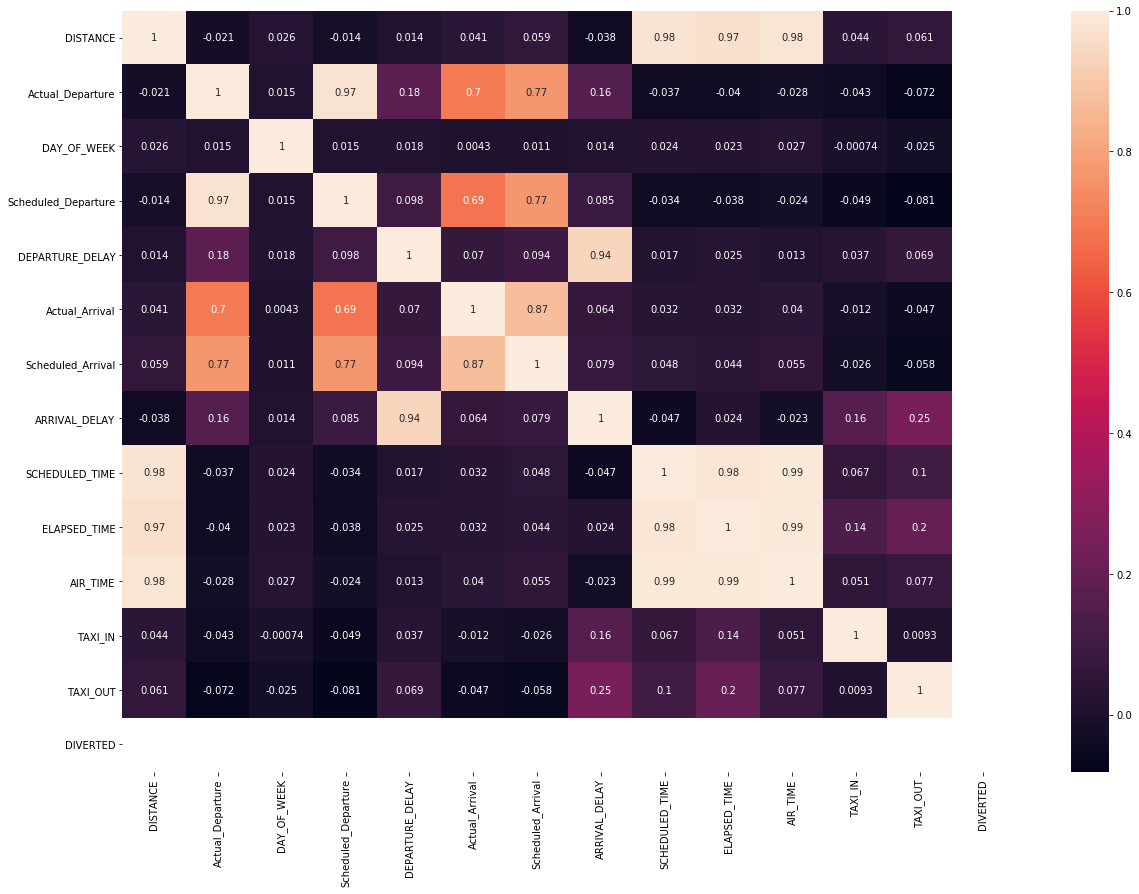

In [31]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(ReqdData.corr(),annot = True)
plt.show()

In [32]:
pca = PCA(n_components=13)

pca.fit(Flights[['DISTANCE','Actual_Departure','DAY_OF_WEEK',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT']])

print(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()

[  5.22848900e-01   3.98982376e-01   5.54608701e-02   1.45180400e-02
   4.67192362e-03   2.17859106e-03   9.00514622e-04   2.59712565e-04
   1.09174137e-04   6.46813083e-05   5.21710189e-06   1.32491009e-32
   3.94160891e-34]


In [33]:
covariance_df = pd.DataFrame(pca.get_covariance())
covariance_df.to_csv('covariance.csv')

correlation_df = pd.DataFrame(Flights[['DISTANCE','Actual_Departure','DAY_OF_WEEK',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT']])
correlation_df.to_csv('correlation_df_original.csv')

pca_df['Variance_Explained'] = pca.explained_variance_ratio_
pca_df['Singular_Values']  = pca.singular_values_

cumsum  = np.cumsum(pca_df['Variance_Explained'],axis=0) 
pca_df['Cumulative Sum of Variance'] = cumsum

pca_df.to_csv('PCA_Dataframe.csv')

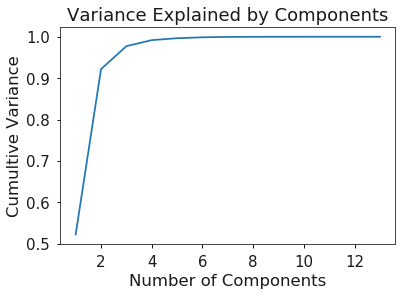

MemoryError: 

In [72]:
pca_transformed_data = pca.transform(Flights[['DISTANCE','Actual_Departure','DAY_OF_WEEK',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT']])

plt.plot(np.arange(13) + 1 ,pca_df['Cumulative Sum of Variance'])
plt.title('Variance Explained by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumultive Variance')
plt.show()

pca_transformed_df = pd.DataFrame(pca_transformed_data , index=np.arange(pca_transformed_data.shape[0]), columns=np.arange(pca_transformed_data.shape[1]))
pca_correlation_df = pd.DataFrame(np.corrcoef(pca_transformed_df))
pca_correlation_df.to_csv('pca_correlation_df.csv')
pca_transformed_df['class'] = np.asarray(df['class'])

# ScatterPlot .. do after PCA
sns.scatterplot(x=0, y=1,hue = 'class',data= pca_transformed_df)
sns.distplot( df['class'], kde=False)
sns.catplot(x="x1", y="y1", hue="gender",col="class", kind = 'bar',data=df, palette = "rainbow")

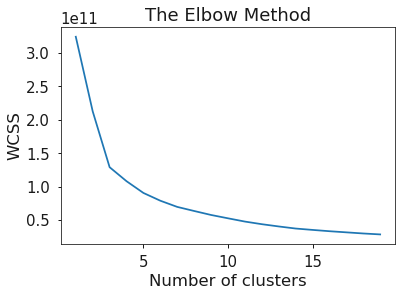

In [73]:
X = pca_transformed_data
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

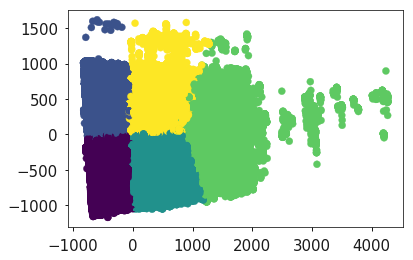

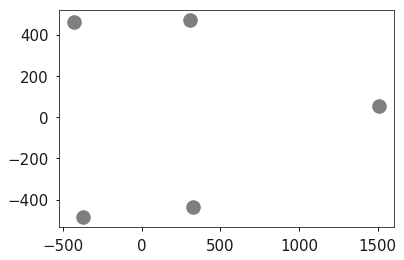

[4 4 4 ..., 0 0 0]


NameError: name 'mode' is not defined

In [77]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()
print(y_kmeans)
labels = np.zeros_like(y_kmeans)
for i in range(num_clusters):
    mask = (y_kmeans == i)
    labels[mask] = mode(df['class'].loc[mask])[0]

print(accuracy_score(df['class'], labels) )

mat = confusion_matrix(df['class'], labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=np.arange(5),
            yticklabels=np.arange(5))
plt.xlabel('true label')
plt.ylabel('predicted label')

In [34]:
df_flights_jan=ReqdData
df_flights_jan['DELAYED'] = df_flights_jan.loc[:,'ARRIVAL_DELAY'].values > 0
# choosing the predictors
feature_list = [
    'AIRLINE'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'DAY_OF_WEEK'
    ,'TAXI_IN'
    ,'TAXI_OUT'
]

X = df_flights_jan[feature_list]

In [35]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()

# Converting "category" airline to integer values
X.iloc[:,feature_list.index('AIRLINE')] = labelenc.fit_transform(X.iloc[:,feature_list.index('AIRLINE')])

C:\Users\utkar\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
df_flights_jan['DELAYED'] = df_flights_jan.loc[:,'ARRIVAL_DELAY'].values > 0
y = df_flights_jan.DELAYED


clf = RandomForestClassifier(n_estimators=9, random_state=32) 
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [37]:
i=0
df_feature_selection = pd.DataFrame(columns=['FEATURE','IMPORTANCE'])
for val in (clf.feature_importances_):
    df_feature_selection.loc[i] = [feature_list[i],val]
    i = i + 1
    

df_feature_selection.sort_values('IMPORTANCE', ascending=False)

,FEATURE,IMPORTANCE
2,DEPARTURE_DELAY,0.443440
3,SCHEDULED_TIME,0.162229
1,ELAPSED_TIME,0.102638
8,TAXI_OUT,0.102159
4,AIR_TIME,0.062681
7,TAXI_IN,0.046748
5,DISTANCE,0.045346
0,AIRLINE,0.019144
6,DAY_OF_WEEK,0.015615


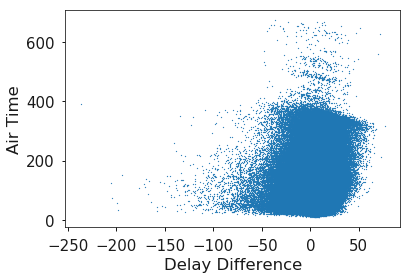

In [78]:
ReqdData['Delay_Difference'] = ReqdData['DEPARTURE_DELAY'] - ReqdData['ARRIVAL_DELAY']
plt.scatter(ReqdData['Delay_Difference'],ReqdData['AIR_TIME'],s=0.9)
plt.xlabel('Delay Difference')
plt.ylabel('Air Time')
plt.show()


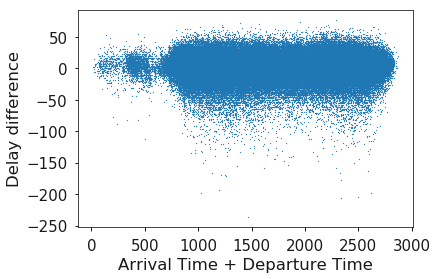

In [83]:
ReqdData['Average_Air'] = ReqdData['Actual_Arrival'] + ReqdData['Actual_Departure']
plt.scatter(ReqdData['Average_Air'],ReqdData['Delay_Difference'],s=0.9)
plt.xlabel('Arrival Time + Departure Time')
plt.ylabel('Delay difference')
plt.show()

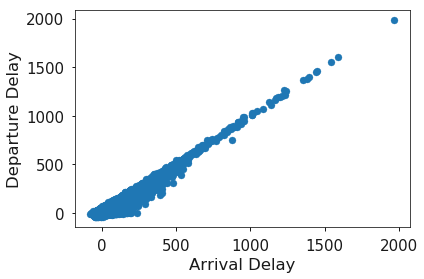

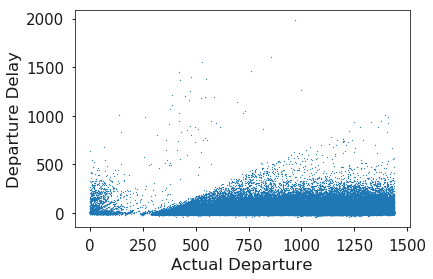

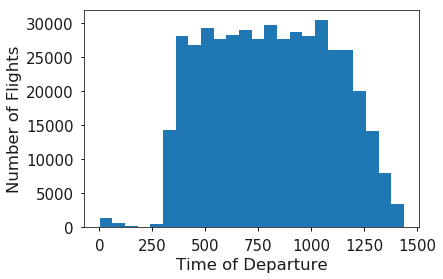

In [84]:
plt.scatter(data3['ARRIVAL_DELAY'],data3['DEPARTURE_DELAY'])
plt.xlabel('Arrival Delay')
plt.ylabel('Departure Delay')
plt.show()
plt.scatter(data3['Actual_Departure'],data3['DEPARTURE_DELAY'], s=0.9)
plt.xlabel('Actual Departure')
plt.ylabel('Departure Delay')
plt.show()
plt.hist(ReqdData['Actual_Departure'],24)
plt.xlabel('Time of Departure')
plt.ylabel('Number of Flights')
plt.show()

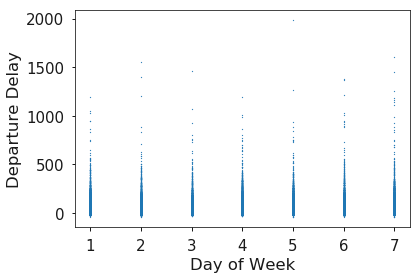

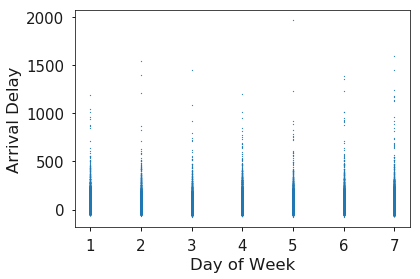

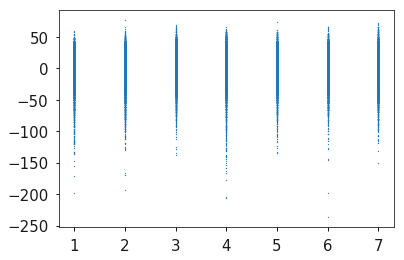

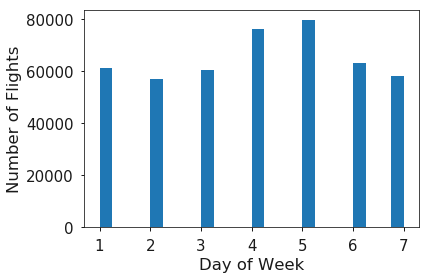

In [86]:
plt.scatter(data3['DAY_OF_WEEK'],data3['DEPARTURE_DELAY'], s=0.9)
plt.xlabel('Day of Week')
plt.ylabel('Departure Delay')
plt.show()

plt.scatter(data3['DAY_OF_WEEK'],data3['ARRIVAL_DELAY'], s=0.9)
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay')
plt.show()
plt.scatter(ReqdData['DAY_OF_WEEK'],ReqdData['Delay_Difference'], s=0.9)
plt.show()
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.hist(ReqdData['DAY_OF_WEEK'],24)
plt.show()

In [57]:
F=ReqdData.groupby('AIRLINE').Delay_Difference.mean().to_frame().sort_values(by='Delay_Difference', ascending=False).round(3)
G=ReqdData.groupby('DAY_OF_WEEK').ARRIVAL_DELAY.mean().to_frame().sort_values(by='ARRIVAL_DELAY', ascending=False).round(3)
print(G)
H=ReqdData.groupby('DAY_OF_WEEK').DEPARTURE_DELAY.mean().to_frame().sort_values(by='DEPARTURE_DELAY', ascending=False).round(3)
print(H)

             ARRIVAL_DELAY
DAY_OF_WEEK               
7                   10.930
1                    9.464
5                    5.836
6                    4.688
2                    4.351
4                    3.736
3                    2.222
             DEPARTURE_DELAY
DAY_OF_WEEK                 
7                     14.276
1                     12.574
5                      9.507
6                      9.310
2                      8.277
4                      7.900
3                      6.478


In [58]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED,DELAYED,Delay_Difference
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,1434.0,2015-01-01,...,270,-22.0,205.0,194.0,169.0,4.0,21.0,0,False,11.0
1,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,41.0,2015-01-01,...,309,-14.0,204.0,194.0,173.0,4.0,17.0,0,False,10.0
2,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,100.0,2015-01-01,...,393,-35.0,218.0,198.0,170.0,11.0,17.0,0,False,20.0
3,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,129.0,2015-01-01,...,400,-12.0,200.0,199.0,176.0,8.0,15.0,0,False,1.0
4,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,297.0,2015-01-01,...,570,-14.0,205.0,199.0,179.0,4.0,16.0,0,False,6.0
5,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,413.0,2015-01-01,...,690,-15.0,210.0,202.0,179.0,7.0,16.0,0,False,8.0
6,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,627.0,2015-01-01,...,902,-9.0,207.0,206.0,180.0,5.0,21.0,0,False,1.0
7,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,810.0,2015-01-01,...,1075,-10.0,195.0,195.0,171.0,6.0,18.0,0,False,0.0
8,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,864.0,2015-01-01,...,1130,-17.0,200.0,189.0,175.0,7.0,7.0,0,False,11.0
9,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,964.0,2015-01-01,...,1235,-24.0,200.0,187.0,173.0,4.0,10.0,0,False,13.0


Atlanta              29024
Chicago              28801
Dallas-Fort Worth    22554
Houston              17727
Los Angeles          17027
Denver               16760
New York             16589
Phoenix              13003
San Francisco        12564
Las Vegas            11493
Orlando               9862
Detroit               9254
Charlotte             9186
Minneapolis           8775
Salt Lake City        8544
Name: Origin_city, dtype: int64


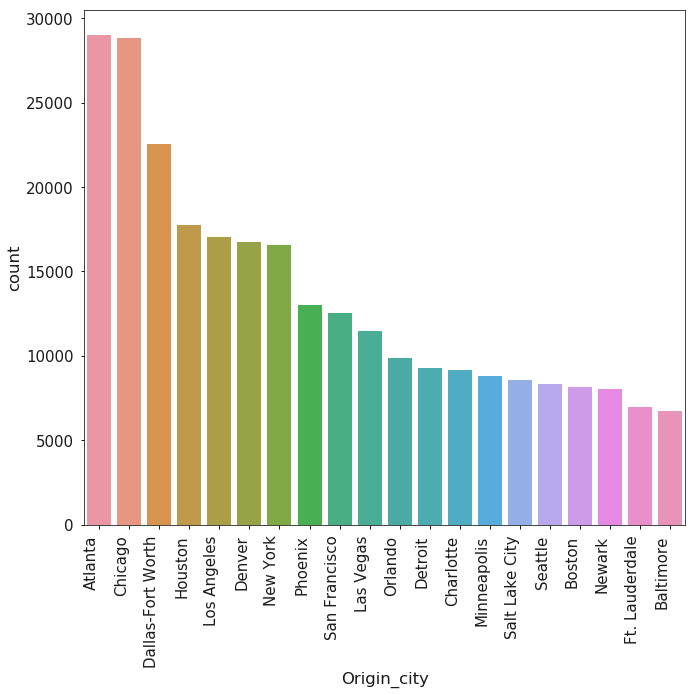

In [68]:
#cities with the most flights
F=ReqdData.Origin_city.value_counts().sort_values(ascending=False)[:15]
print(F)
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Hartsfield-Jackson Atlanta International Airport                          29024
Dallas/Fort Worth International Airport                                   22554
Chicago O'Hare International Airport                                      22305
Los Angeles International Airport                                         17027
Denver International Airport                                              16760
George Bush Intercontinental Airport                                      13189
Phoenix Sky Harbor International Airport                                  13003
San Francisco International Airport                                       12564
McCarran International Airport                                            11493
Orlando International Airport                                              9862
Detroit Metropolitan Airport                                               9254
Charlotte Douglas International Airport                                    9186
Minneapolis-Saint Paul International Air

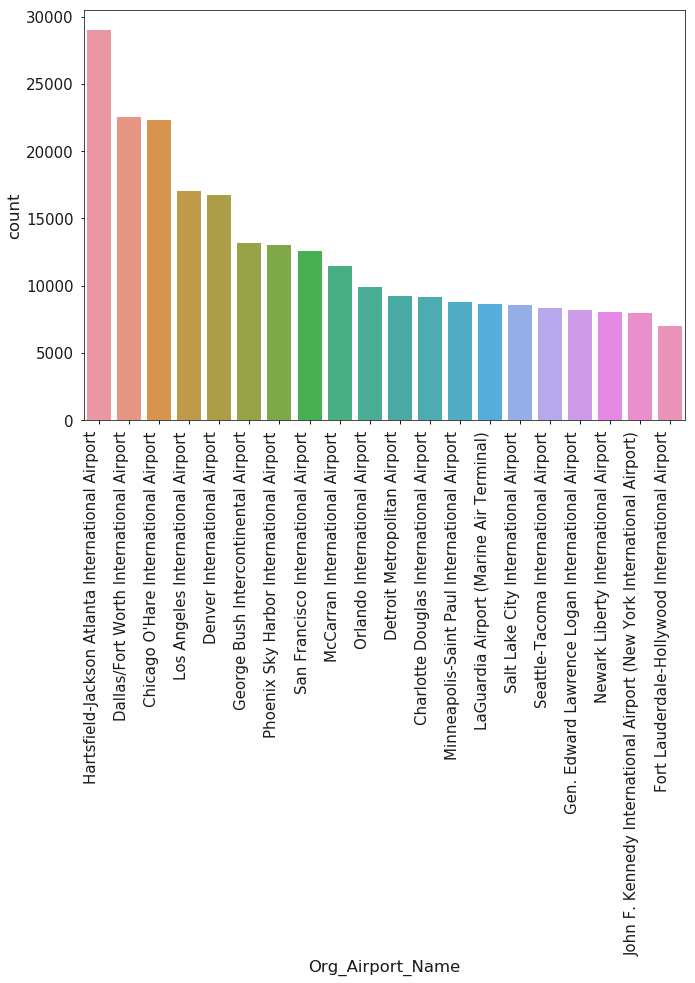

In [70]:

F=ReqdData.Org_Airport_Name.value_counts().sort_values(ascending=False)[:20]
print(F)
plt.figure(figsize=(10, 14))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

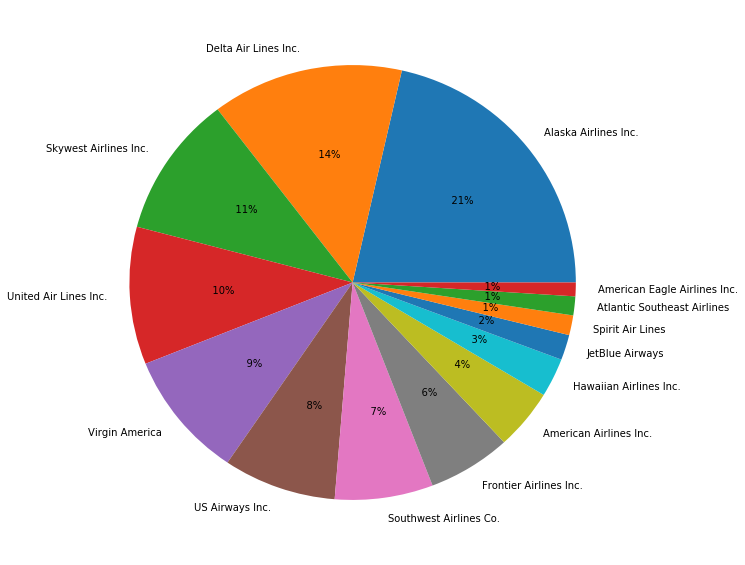

In [62]:
axis = plt.subplots(figsize=(10,10))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

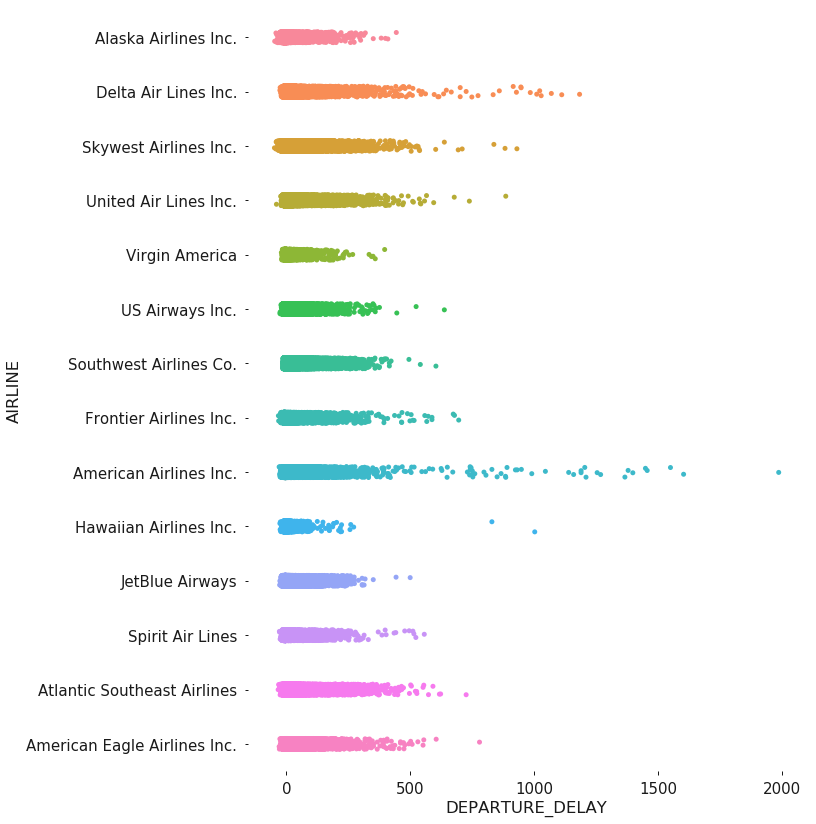

In [76]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="DEPARTURE_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

In [64]:
%%html
<div class='tableauPlaceholder' id='viz1569936847474' style='position: relative'><noscript><a href='#'><img alt=' ' 
src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1_rss.png' style='border: none'
/></a></noscript><object class='tableauViz'  
style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' 
/> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;9BD44NRJ9' 
/> <param name='toolbar' value='yes' 
/><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;9B&#47;9BD44NRJ9&#47;1.png' 
/> <param name='animate_transition' value='yes'
/><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' 
/><param name='display_overlay' value='yes' /><param name='display_count' value='yes' 
/><param name='filter' value='publish=yes' /></object></div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1569936847474');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>

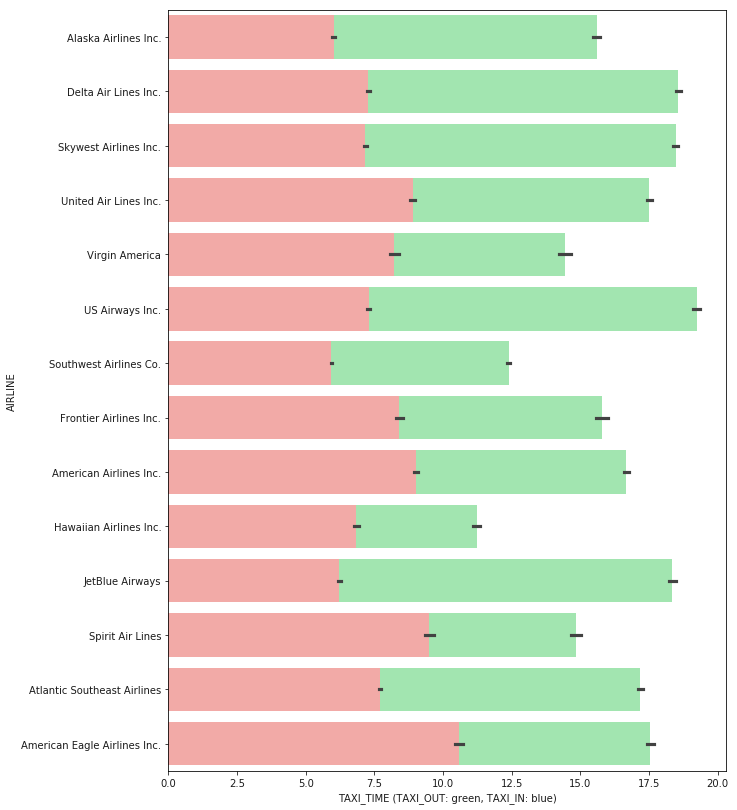

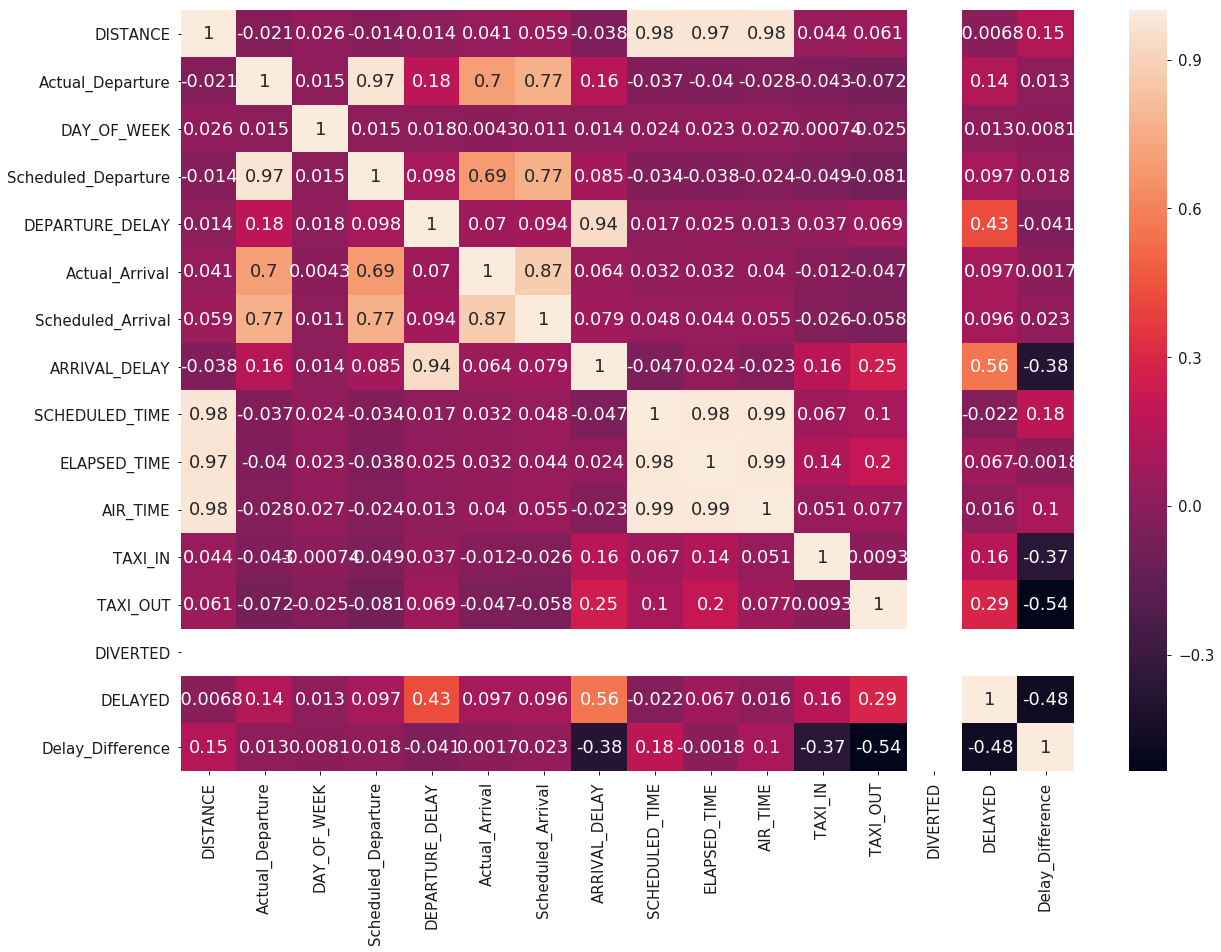

In [65]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=Flights, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=Flights, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")
axis = plt.subplots(figsize=(20,14))
sns.heatmap(Flights.corr(),annot = True)
plt.show()